In [254]:
import pandas as pd
import seaborn as sns

# Data Prep

In [256]:
athletes = pd.read_csv("athlete_events.csv")

In [459]:
athletes['Event'].nunique()

651

In [258]:
athletes = athletes[athletes["Season"] == "Summer"]

In [461]:
athletes.shape

(222552, 15)

In [264]:
def team_summary(data):
    return pd.Series({
        'team': data.iloc[0,:]["NOC"],
        'country': data.iloc[-1,:]["Team"],
        'year': data.iloc[0,:]["Year"],
        'events': len(data['Event'].unique()),
        'athletes': data.shape[0],
        'age': data["Age"].mean(),
        'height': data['Height'].mean(),
        'weight': data['Weight'].mean(),
        'medals': sum(~pd.isnull(data["Medal"]))
    })

team = athletes.groupby(["NOC", "Year"]).apply(team_summary)

C:\Users\Priya\AppData\Local\Temp\ipykernel_30312\3415778410.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team = athletes.groupby(["NOC", "Year"]).apply(team_summary)


In [265]:
team.sample(5)

,,team,country,year,events,athletes,age,height,weight,medals
NOC,Year,,,,,,,,,
CAM,2016,CAM,Cambodia,2016,6,6,29.500000,163.500000,56.833333,0
IRI,1976,IRI,Iran,1976,50,104,25.586538,173.067308,70.480769,2
COD,2004,COD,Congo (Kinshasa),2004,4,6,20.833333,173.333333,65.000000,0
MRI,1996,MRI,Mauritius,1996,23,36,23.861111,175.954545,71.108696,0
NOR,1988,NOR,Norway,1988,42,79,24.987342,178.961538,74.205128,22


In [268]:
team = team.reset_index(drop=True)
team = team.dropna()

In [393]:
def prev_medals(data):
    data = data.sort_values("year", ascending=True)
    data["prev_medals"] = data["medals"].shift(1)
    data["prev_3_medals"] = data["medals"].astype(float).rolling(3, closed="left", min_periods=1).mean()
    data["prev_5_medals"] = data["medals"].astype(float).rolling(5, min_periods=1).mean()
    data["medals_per_athlete"] = data["prev_medals"] / data["athletes"]
    data["athletes_per_event"] = data["athletes"] / data["events"]
    data["prev_medalist_ratio"] = data["prev_medals"] / data["athletes"]
    return data

teams = team.groupby(["team"]).apply(prev_medals)
teams = teams.reset_index(drop=True)
teams = teams[teams["year"] > 1960]
teams = teams.round(1)

C:\Users\Priya\AppData\Local\Temp\ipykernel_30312\247775758.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  teams = team.groupby(["team"]).apply(prev_medals)


In [395]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,prev_5_medals,medals_per_athlete,athletes_per_event,prev_medalist_ratio
1,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0,0.0,0.0,1.0,0.0
2,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0,0.0,0.0,1.0,0.0
4,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0,0.0,0.0,1.0,0.0
5,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0,0.0,0.0,1.4,0.0
2609,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0,0.6,0.0,1.3,0.0
2610,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0,1.4,0.2,1.1,0.2
2611,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,1.4,0.4,1.1,0.4


In [397]:
teams.corr(numeric_only=True)["medals"]

year                  -0.021603
events                 0.771330
athletes               0.840817
age                    0.025096
height                 0.141055
weight                 0.090577
medals                 1.000000
prev_medals            0.920048
prev_3_medals          0.918438
prev_5_medals          0.953588
medals_per_athlete     0.376172
athletes_per_event     0.423770
prev_medalist_ratio    0.376172
Name: medals, dtype: float64

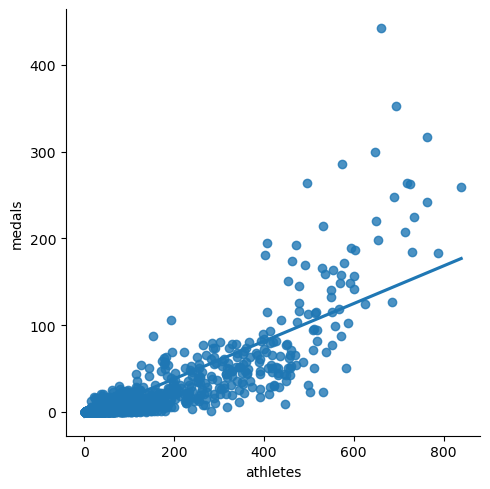

In [399]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None) 

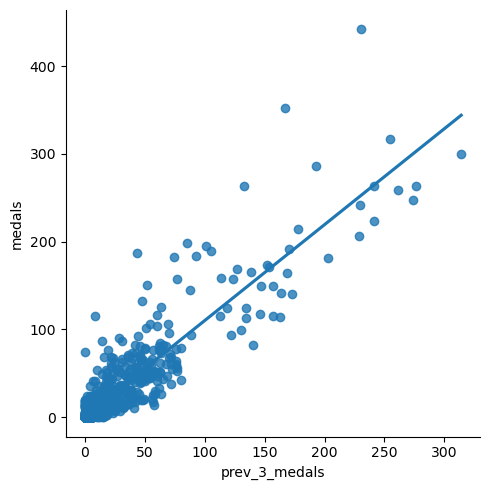

In [517]:
sns.lmplot(x='prev_3_medals', y='medals', data=teams, fit_reg=True, ci=None) 

<Axes: ylabel='Frequency'>

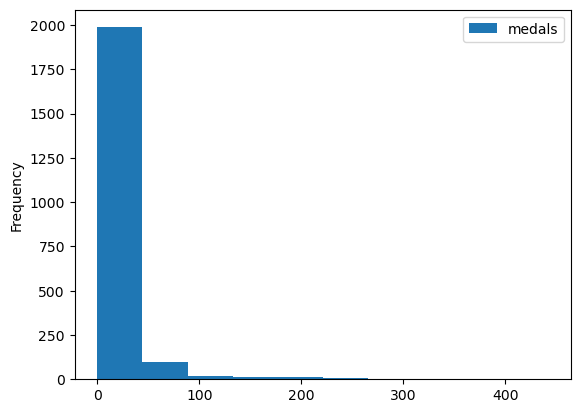

In [403]:
teams.plot.hist(y="medals")

In [415]:
teams[teams.isnull().any(axis=1)].head(5)

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,prev_5_medals,medals_per_athlete,athletes_per_event,prev_medalist_ratio


In [407]:
teams = teams.dropna()
teams.shape

(2014, 15)

In [409]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [411]:
# About 80% of the data
train.shape


(1609, 15)

In [413]:
# About 20% of the data
test.shape

(405, 15)

# Preditcion and testing (majorly using medals won in previous years)

In [417]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()

In [519]:
predictors = ["athletes", "prev_medals",  "prev_3_medals", "prev_5_medals" ]

In [521]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [523]:
predictions = reg.predict(test[predictors])

In [525]:
predictions.shape

(405,)

In [527]:
test["predictions"] = predictions

In [529]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [531]:
test["predictions"] = test["predictions"].round()

In [533]:
error = mean_absolute_error(test["medals"], test["predictions"])
error

2.4246913580246914

In [535]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [537]:
test["predictions"] = predictions

In [539]:
test[test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,prev_5_medals,medals_per_athlete,athletes_per_event,prev_medalist_ratio,predictions
2508,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,274.0,265.8,0.5,2.8,0.5,298.214963
2509,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,276.0,266.8,0.3,2.9,0.3,275.317821


In [541]:
test[test["team"] == "IND"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,prev_5_medals,medals_per_athlete,athletes_per_event,prev_medalist_ratio,predictions
1121,IND,India,2012,55,95,26.0,174.2,72.7,6,3.0,1.7,2.4,0.0,1.7,0.0,4.632015
1122,IND,India,2016,67,130,26.1,170.0,66.3,2,6.0,3.3,2.6,0.0,1.9,0.0,3.982758


In [543]:
errors = (test["medals"] - predictions).abs()

In [545]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 

In [563]:
error_ratio

team
AFG    1.579085
ALG    0.926025
ARG    0.258761
ARM    0.304242
AUS    0.433102
         ...   
UKR    0.543540
USA    0.120181
UZB    0.298983
VEN    0.183212
VIE    0.626635
Name: medals, Length: 97, dtype: float64

In [561]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

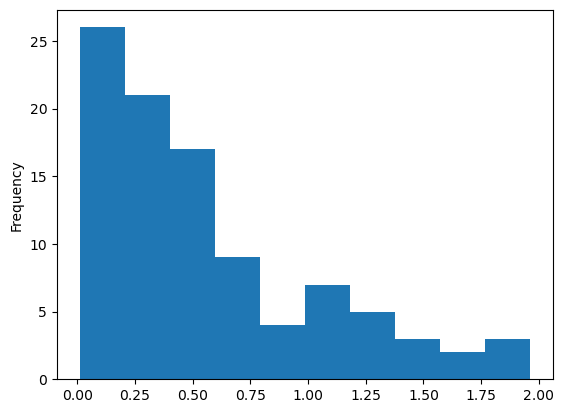

In [565]:
error_ratio.plot.hist()

In [551]:
error_ratio.sort_values()

team
FRA    0.009671
CZE    0.031605
EGY    0.062657
ITA    0.064354
SLO    0.074579
         ...   
AFG    1.579085
UAE    1.583515
CUB    1.829729
JOR    1.883925
NIG    1.963674
Name: medals, Length: 97, dtype: float64